In [3]:
import dask.dataframe as dd

In [4]:
help(dd)

Help on package dask.dataframe in dask:

NAME
    dask.dataframe

PACKAGE CONTENTS
    _accessor
    _compat
    _dtypes
    accessor
    backends
    categorical
    core
    extensions
    groupby
    hyperloglog
    indexing
    io (package)
    methods
    multi
    optimize
    partitionquantiles
    reshape
    rolling
    shuffle
    tests (package)
    tseries (package)
    utils

SUBMODULES
    demo

FILE
    e:\anaconda\lib\site-packages\dask\dataframe\__init__.py




In [5]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1
def add(x,y):
    sleep(1)
    return x+y

In [6]:
%%time
x=inc(1)
y=inc(2)
z=add(x,y)
z

Wall time: 3 s


5

In [7]:
from dask import delayed

In [8]:
from dask import delayed
x=delayed(inc)(1)
y=delayed(inc)(2)
z=delayed(add)(x,y) #now here z is a "thunk" object

In [9]:
z

Delayed('add-9908c35f-2ba5-46e0-b822-de017a7f6150')

In [10]:
%%time
z.compute()

Wall time: 2.36 s


5

In [1]:
from dask.distributed import Client, progress
client = Client(n_workers=2, threads_per_worker=2, memory_limit='1GB')
client

E:\anaconda\lib\site-packages\distributed\dashboard\core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:55839 Dashboard: http://127.0.0.1:55842/status,Cluster Workers: 2 Cores: 4 Memory: 2.00 GB


In [9]:
data=[1,2,3,4,5,6,7,8]
results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)
print(total)

44


In [8]:

results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)

Before computing: Delayed('sum-1b735e59-c725-49f9-907f-710fcff3dd34')
After computing : 44


In [21]:
# pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [30]:
import graphviz
total.visualize()
###if this generates error then first execute "pip install graphviz"####

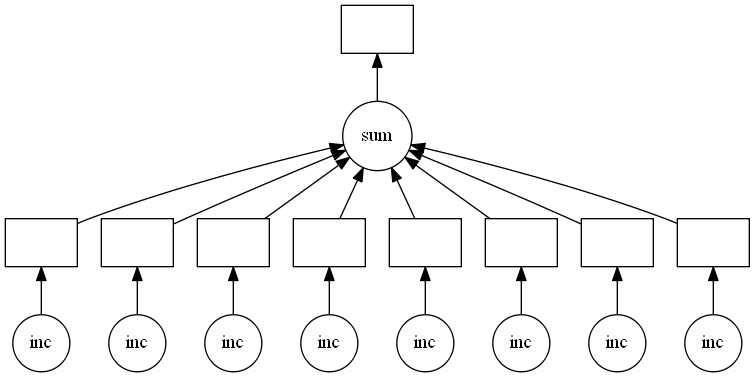

In [33]:
total.visualize()

In [22]:
client.close()